In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Train_data = pd.read_csv("GoogleStockPrice_Train.csv")
Test_data = pd.read_csv("GoogleStockPrice_Test.csv")

In [3]:
Train_data

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [4]:
Test_data

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"


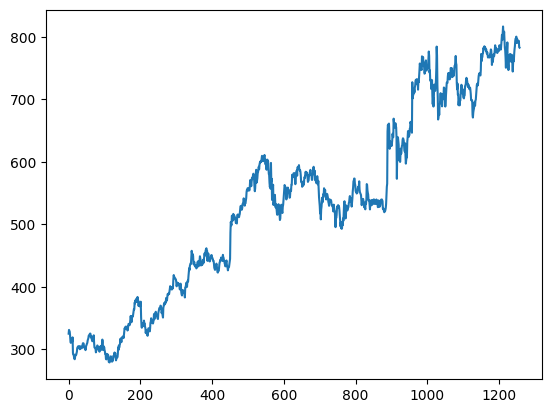

In [5]:
plt.plot(Train_data["Open"])
plt.show()

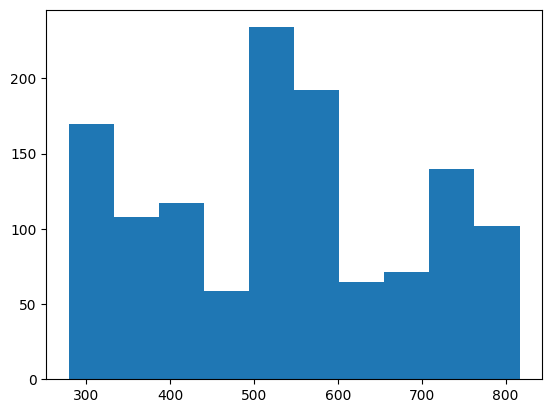

In [6]:
plt.hist(Train_data['Open'])
plt.show()

In [7]:
train_set = Train_data.loc[:, ["Open"]].values
train_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [8]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
train_set = sc.fit_transform(train_set)

In [9]:
train_set

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [10]:
X_train = train_set[0: 1257]
y_train = train_set[1: 1258]

X_train = np.reshape(X_train, (1257, 1, 1))

In [11]:
X_train

array([[[0.08581368]],

       [[0.09701243]],

       [[0.09433366]],

       ...,

       [[0.95163331]],

       [[0.95725128]],

       [[0.93796041]]])

In [12]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [13]:
model = Sequential()

model.add(LSTM(activation='sigmoid', return_sequences=True, units=260, input_shape=(None, 1)))
model.add(LSTM(activation='sigmoid', return_sequences=True, units=130, input_shape=(None, 1)))
model.add(LSTM(activation='sigmoid', return_sequences=True, units=60, input_shape=(None, 1)))

model.add(Dense(units=1))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, None, 260)         272480    
                                                                 
 lstm_1 (LSTM)               (None, None, 130)         203320    
                                                                 
 lstm_2 (LSTM)               (None, None, 60)          45840     
                                                                 
 dense (Dense)               (None, None, 1)           61        
                                                                 
Total params: 521,701
Trainable params: 521,701
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(optimizer="adam", loss="mae")

In [16]:
model.fit(X_train, y_train, batch_size=32, epochs=50)

Epoch 1/50
40/40 [==============================] - 8s 23ms/step - loss: 0.2676
Epoch 2/50
40/40 [==============================] - 1s 20ms/step - loss: 0.2326
Epoch 3/50
40/40 [==============================] - 1s 20ms/step - loss: 0.2324
Epoch 4/50
40/40 [==============================] - 1s 26ms/step - loss: 0.2312
Epoch 5/50
40/40 [==============================] - 1s 21ms/step - loss: 0.2327
Epoch 6/50
40/40 [==============================] - 1s 20ms/step - loss: 0.2277
Epoch 7/50
40/40 [==============================] - 1s 21ms/step - loss: 0.2178
Epoch 8/50
40/40 [==============================] - 1s 23ms/step - loss: 0.1997
Epoch 9/50
40/40 [==============================] - 1s 22ms/step - loss: 0.1247
Epoch 10/50
40/40 [==============================] - 1s 23ms/step - loss: 0.0267
Epoch 11/50
40/40 [==============================] - 1s 24ms/step - loss: 0.0211
Epoch 12/50
40/40 [==============================] - 1s 23ms/step - loss: 0.0174
Epoch 13/50
40/40 [==================

In [17]:
real_stock_price = Test_data.loc[:, ["Open"]].values
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [18]:
inputs = real_stock_price
inputs = sc.transform(inputs)
inputs

array([[0.92955205],
       [0.94731751],
       [0.94307612],
       [0.96015329],
       [0.98087655],
       [0.98359253],
       [0.97827219],
       [0.98225314],
       [0.98288563],
       [0.98214153],
       [0.979779  ],
       [0.97849542],
       [0.98182528],
       [0.98245777],
       [1.01045465],
       [1.02407173],
       [1.03930724],
       [1.03354044],
       [0.99624228],
       [0.9631297 ]])

In [19]:
inputs = np.reshape(inputs, (20, 1, 1))  

In [20]:
predicted_stock_price = model.predict(inputs)

1/1 [==============================] - 2s 2s/step


In [21]:
predicted_stock_price

array([[[0.937382  ]],

       [[0.95380044]],

       [[0.94989157]],

       [[0.96558756]],

       [[0.98448014]],

       [[0.98694354]],

       [[0.98211545]],

       [[0.9857291 ]],

       [[0.9863026 ]],

       [[0.98562807]],

       [[0.9834838 ]],

       [[0.98231816]],

       [[0.98534113]],

       [[0.98591465]],

       [[1.0111442 ]],

       [[1.0232973 ]],

       [[1.0368017 ]],

       [[1.0317019 ]],

       [[0.9983769 ]],

       [[0.9683114 ]]], dtype=float32)

In [22]:
pred_price = np.reshape(predicted_stock_price, (20, 1))

In [23]:
pred_price = sc.inverse_transform(pred_price)

In [24]:
pred_price

array([[783.01904],
       [791.8449 ],
       [789.7437 ],
       [798.1813 ],
       [808.3371 ],
       [809.6614 ],
       [807.066  ],
       [809.0085 ],
       [809.31683],
       [808.9542 ],
       [807.8015 ],
       [807.1749 ],
       [808.8    ],
       [809.1083 ],
       [822.67065],
       [829.2037 ],
       [836.4631 ],
       [833.7217 ],
       [815.8075 ],
       [799.64545]], dtype=float32)

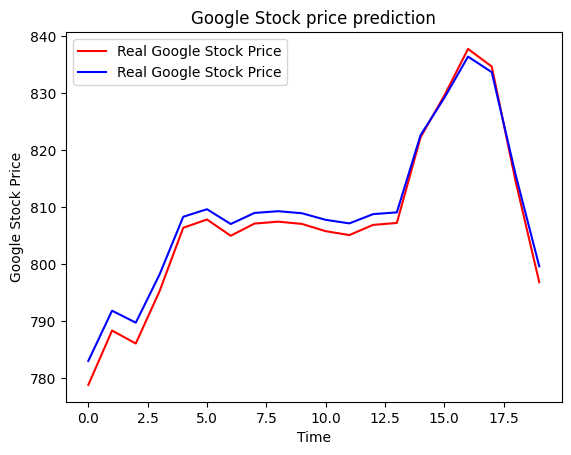

In [25]:
plt.plot( real_stock_price , color = 'red' , label = 'Real Google Stock Price')
plt.plot( pred_price , color = 'blue' , label = 'Real Google Stock Price')
plt.title('Google Stock price prediction')
plt.ylabel("Google Stock Price")
plt.xlabel("Time")
plt.legend()
plt.show()